# Conducción de calor 1D

$$ \frac{\partial T(x,t)}{\partial t}=\alpha \frac{\partial^{2}T(x,t)}{\partial x^{2}} $$

## Método explícito de las diferencias finitas
$$ \frac{T_{i}^{ n+1}-T_{i}^{n}}{\Delta t}=\alpha \frac{T_{i-1}^{n}-2T_{i}^{n}+T_{i+1}{n}}{(\Delta x)^{2}} $$

$$ T_{i}^{ n+1}=\frac{\alpha \Delta t}{(\Delta x)^{2}}(T_{i-1}^{i}-2T_{i}^{n}+T_{i+1}^{n})+T_{i}^{n} $$
Tomando $$ r=\frac{\alpha \Delta t}{(\Delta x)^{2}} $$
Queda finalmente:
$$T_{i}^{ n+1}=rT_{i-1}^{n}+(1-2r)T_{i}^{n}+rT_{i+1}^{n}     (1)  $$

<img src='conduccion1d.png'>

### Condición inicial
$$T(x,t_{o})=T_{o}$$
### Condición de borde en x=0
En X=0 $\frac{\partial T}{\partial x}=0$ (Adiábatico)
$$\frac{\partial T}{\partial x}=0 \Rightarrow \frac{T_{o}^{n}-T_{-1}^{n}}{\Delta x}=0\Rightarrow T_{o}^{n}-T_{-1}^{n}=0$$
Reemplazando queda:
$$T_{o}^{n+1}=(1-r)T_{o}^{n}+rT_{1}^{n}$$ 
###  Condición de borde en x=L
en x=L 
$$q_{cond}+q_{conv}=0$$

$$-k\frac{\partial T}{\partial x}=h(T-T_{\infty })$$

$$-k\frac{T_{M+1}^{n}-T_{M-1}^{n}}{2\Delta x}=h(T-T_{\infty })$$

$$T_{M+1}^{n}=\frac{2\Delta xh}{k}(T_{\infty }-T)+T_{M-1}^{n} (1)$$ 

Haciendo T(M) en (1) queda:

$$T_{M}^{n+1}=rT_{M-1}^{n}+(1-2r)T_{M}^{n}+r(\frac{2\Delta xh}{k}(T_{\infty }-T)+T_{M-1}^{n})$$

Desarrollando finalmente queda: 

$$T_{M}^{n+1}=2rT_{M-1}^{n}+(1-2r\beta T_{M}^{n})+2r\gamma$$

Donde:

$$\beta=1+\frac{h\Delta x}{k}, \gamma=\frac{\Delta x h T_{\infty}}{k} $$

### Criterio de estabilidad:
$$r<0.5$$

## Programa

In [33]:
#Importaciones

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#%matplotlib notebook
#%matplotlib inline
#Datos del problema
h=0.3
L=1 #Largo de la barra
dx=0.2 # Delta x (espacio entre nodos)
dt=0.05 # Delta t (espaciado del tiempo)
tmax = 10 # Tiempo máximo
alpha = 0.2 #difusividad termica
npos=L/dx #numero de nodos en i
ntemp=tmax/dt #numero de "nodos" de tiempo
k=0.6 #Conductividad termica del material
Tamb=25 #Temperatura ambiente
b=1+(dx*h)/k
j=dx*h*Tamb/k

In [34]:
r=(alpha*dt)/dx**2

In [35]:
tmax/dt

200.0

In [36]:
r

0.25

In [37]:
#Vector que contiene los n tiempos
temp=np.linspace(0,tmax,int(ntemp))
#Vector que contiene las i posiciones
pos=np.linspace(0,L,int(npos))
    
    

In [38]:
# Creamos una matriz de 2x2 que contenga las las temperaturas en las columnas y en las filas contiene la variable tiempo
T=np.zeros((int(ntemp),int(npos)))

# Condiciones iniciales
T[0,:]=100.0#temperatura 50 a lo largo de la barra, en el tiempo 0, Recordar: En python las posiciones comienzan de 0!!


#Programa principal

for n in range(len(T[:,1])-1):
    for i in range(1,len(T[1,:])-1):

        #condición de borde x=0 (aislación en i=0)
        T[n+1,0]=(1-r)*T[n,0] + r*T[n,1]
        #Iteraciones
        
        T[n+1,i]=r*T[n,i-1]+(1-2*r)*T[n,i]+r*T[n,i+1]
           
        #Condición de borde en x=L
        
        T[n+1,int(npos-1)]=2*r*T[n,int(npos-1)]+(1-2*r*b)*T[n,int(npos-1)]+2*r*j
     
        


### Resultados

In [39]:
#T

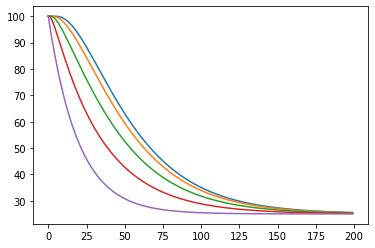

In [40]:
plt.plot(T)

MovieWriter PillowWriter unavailable; using Pillow instead.


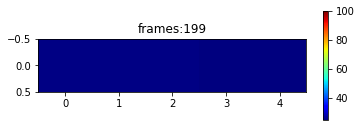

In [41]:
fig, ax = plt.subplots()

plt.xlabel("Nodos en x")

def animate(frames):
    a=T[frames,:]
    a=np.expand_dims(a,axis=0)
    plt.clf()
    b=str(frames)
    plt.title('frames:%i' %(frames))
    plt.imshow(a,cmap='jet')
    plt.clim(25,100)
    plt.colorbar(shrink=0.5)
    
    return plt
    

anim=animation.FuncAnimation(fig,animate,frames=len(T),interval=200,repeat=False)
anim.save("heat_equation_solution.gif",writer='PillowWriter')
